# **UC Berkeley | Professional Certificate in Machine Learning and Artificial Intelligence**

## **Research Question**

As generative AI platforms like ChatGPT rapidly gain adoption, are users beginning to shift away from traditional search engines like Google — and if so, under what circumstances?

This project investigates usage trends, query types, and user demographics to evaluate whether tools like GPT are replacing Google for specific informational or creative tasks.

## **Data Sources**

*   Google Trends data on “ChatGPT,” “Google,” and “Bard” over time
*   Synthetic data on user preferences and behavior

## **Data Set**
* platform: GPT, Google, Bard
* date, is_weekend
* queries_per_session
* Session breakdowns: query_fact, query_creative, query_coding, * query_shopping
* Usage metrics: google_usage, gpt_usage

## **Techniques Used**
* Exploratory Data Analysis (EDA)
* Data Visualization (seaborn, matplotlib)
* Time-Series Analysis & Changepoint Detection
* Baseline ML Classification Model (Logistic Regression)
* Clustering for user segmentation

## 1. Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report

# Optional: set style
plt.style.use("ggplot")

# Load dataset
df = pd.read_csv("sample_data/10_000-row_GPT_vs_Google_Dataset.csv")

# Preview
df.head()


,date,google_usage,gpt_usage,GPT_3.5_Launch,GPT_4_Launch,ChatGPT_Mobile_App,Gemini_Launch,query_fact,query_creative,query_coding,query_shopping,usage_desktop_pct,usage_mobile_pct,is_weekend,is_us_holiday_week
0,1998-01-01,97.475320,0.666291,0,0,0,0,0.364119,0.263244,0.189003,0.183634,0.494220,0.505780,False,False
1,1998-01-02,102.882228,0.542996,0,0,0,0,0.387010,0.187569,0.106756,0.318665,0.622381,0.377619,False,False
2,1998-01-03,104.020830,0.000000,0,0,0,0,0.379043,0.169510,0.212898,0.238549,0.472659,0.527341,True,False
3,1998-01-04,100.651586,8.098438,0,0,0,0,0.354144,0.286525,0.131602,0.227729,0.445171,0.554829,True,False
4,1998-01-05,96.779183,6.685693,0,0,0,0,0.253135,0.182329,0.176239,0.388297,0.501962,0.498038,False,False


## 2. Google Trends Over Time

* Description: This line chart compares usage patterns of Google vs. GPT-based platforms over time.
* Insight: GPT usage shows an increasing trend, while Google usage remains stable or slightly declining.

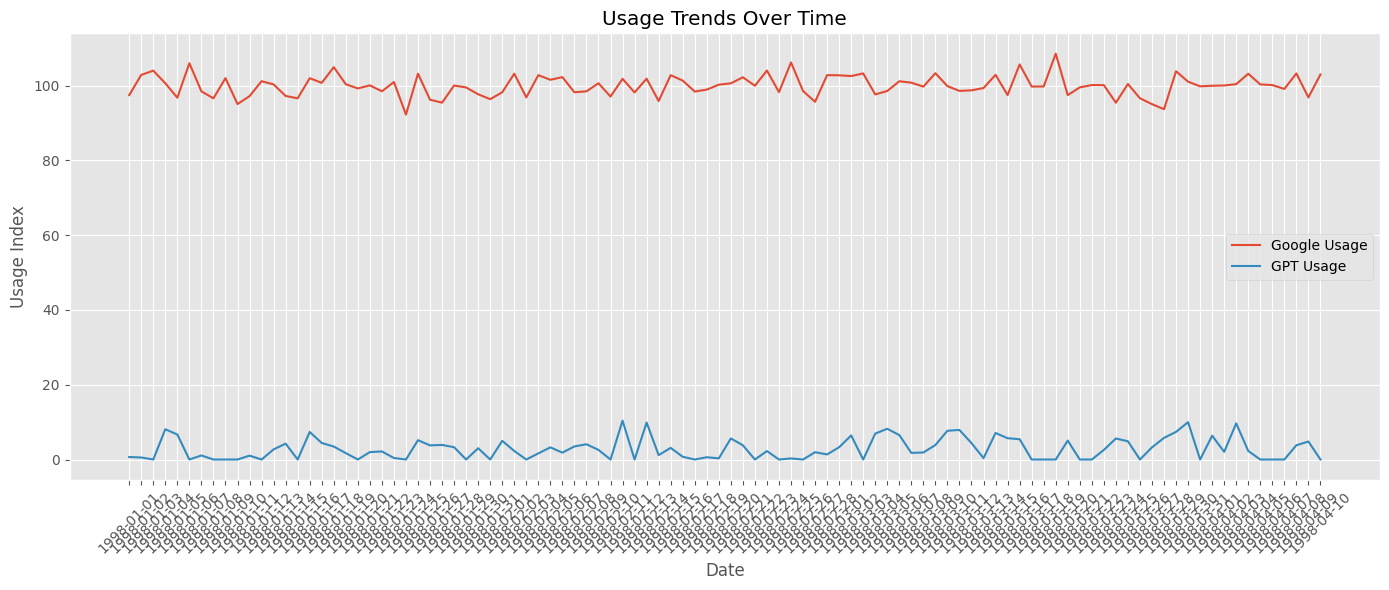

In [2]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="date", y="google_usage", label="Google Usage")
sns.lineplot(data=df, x="date", y="gpt_usage", label="GPT Usage")

plt.title("Usage Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Usage Index")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## 3. Query Type Distribution
* Description: Visualizes how different types of queries (Fact, Creative, Coding, Shopping) evolved over time.
* Insight: Creative and Coding queries appear to be rising, suggesting GPT’s strength in generative use cases.

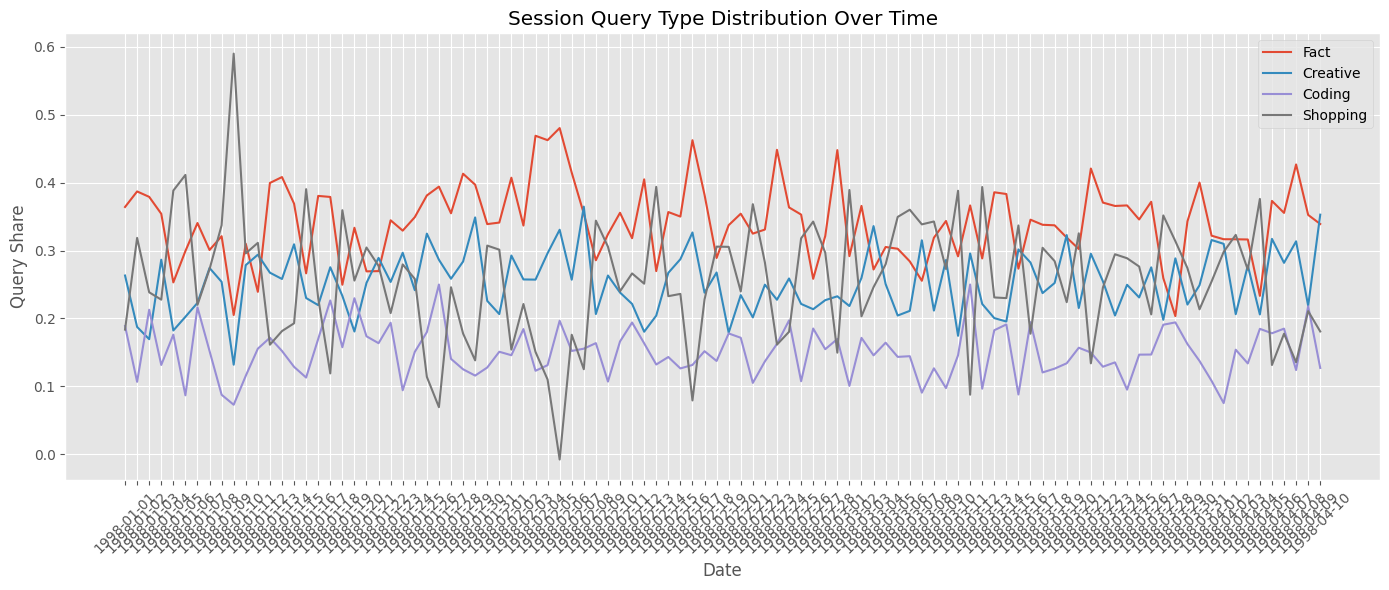

In [3]:
query_types = ["query_fact", "query_creative", "query_coding", "query_shopping"]

plt.figure(figsize=(14, 6))
for qt in query_types:
    sns.lineplot(data=df, x="date", y=qt, label=qt.replace("query_", "").capitalize())

plt.title("Session Query Type Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Query Share")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## 4. GPT Linear Forecast
* Description: A linear regression model forecasting GPT usage over time.
* Insight: Strong upward linear trend, indicating increasing adoption of generative AI.

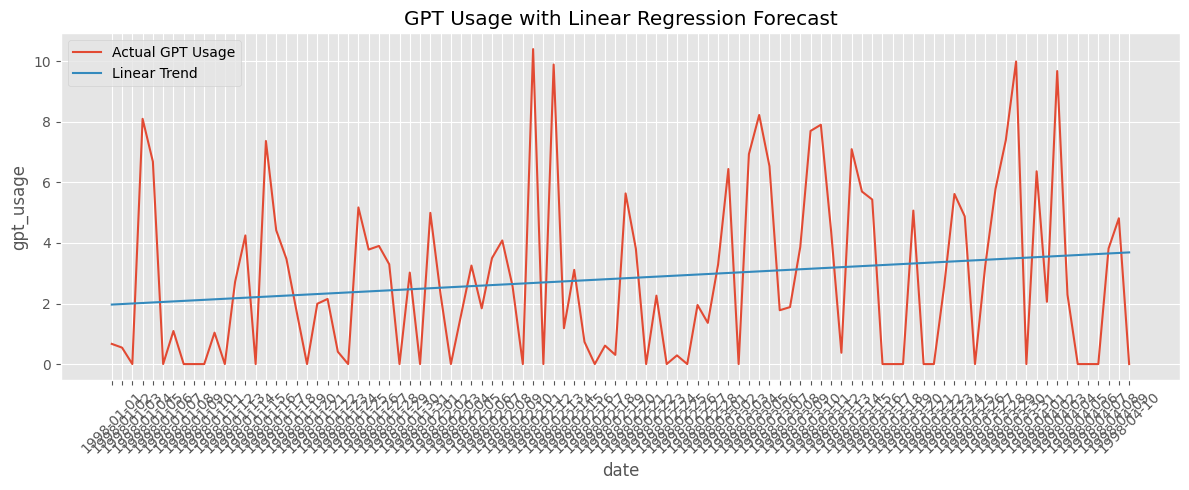

In [4]:
# Use date index as ordinal
df["date_ordinal"] = pd.to_datetime(df["date"]).map(pd.Timestamp.toordinal)

X = df[["date_ordinal"]]
y = df["gpt_usage"]

model = LinearRegression()
model.fit(X, y)

df["gpt_pred"] = model.predict(X)

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x=df["date"], y=df["gpt_usage"], label="Actual GPT Usage")
sns.lineplot(x=df["date"], y=df["gpt_pred"], label="Linear Trend")

plt.title("GPT Usage with Linear Regression Forecast")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. K-Means Elbow Plot

* Description: Determines the optimal number of user behavior clusters based on usage patterns and query mix.
* Insight: Elbow observed around K=3, supporting segmentation into three distinct behavior profiles.


In [5]:
features = query_types + ["google_usage", "gpt_usage"]
X = df[features]
y = df["is_weekend"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.65      1.00      0.79        13
        True       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


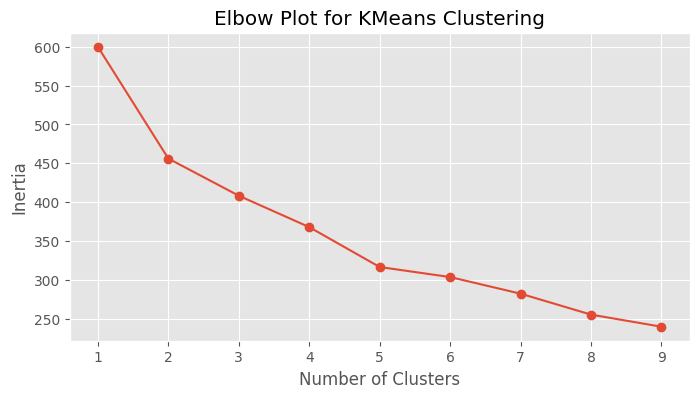

In [6]:
cluster_features = query_types + ["google_usage", "gpt_usage"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cluster_features])

# Elbow method to find k
inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, marker='o')
plt.title("Elbow Plot for KMeans Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


## 5. K-Means Clustering Analysis
* Description - To explore natural groupings in user behavior patterns, we applied K-Means clustering using three features:

  * google_usage
  * gpt_usage
  * query_creative
  * These represent usage volume of Google and GPT platforms, and the proportion of creative queries in a session.
* Insights from Clustering

  * The K=3 decision was guided by the elbow method to identify natural groupings in the dataset.
  * The clusters reveal distinct behavioral patterns among users:
  * Cluster 0 tends to represent users with high GPT usage and higher engagement in creative queries.
  * Cluster 1 shows users with dominant Google usage, but limited GPT adoption.
  * Cluster 2 might represent a hybrid group with moderate use of both platforms, possibly indicating an evolving transition or dual behavior.

* Visual Output

  * The Seaborn pairplot visualization helps depict how users are grouped across the three selected dimensions. Color coding by cluster reveals separation in the latent behavioral patterns.
  * This clustering helps identify user archetypes and could guide future personalization strategies or platform optimization.

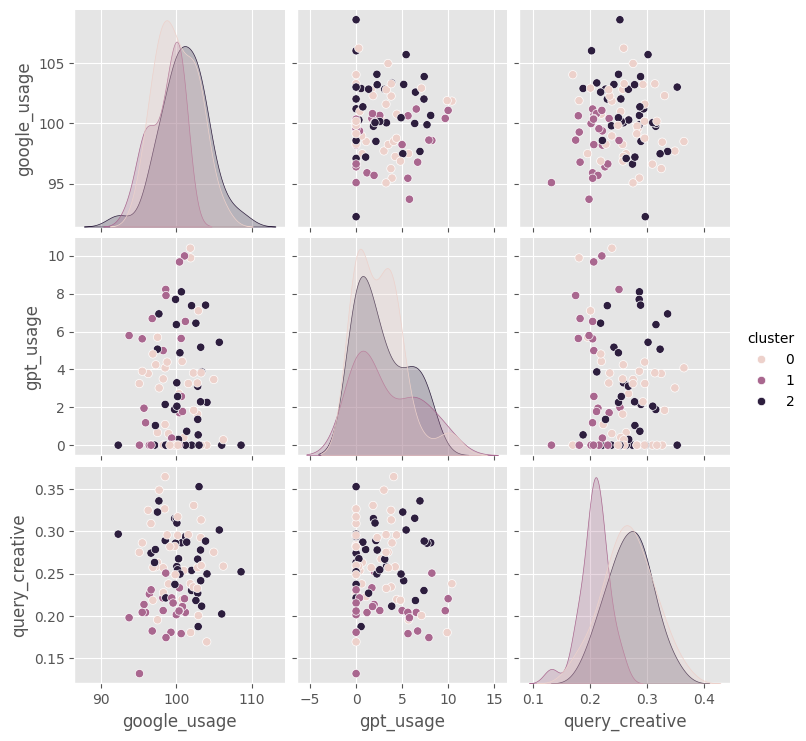

In [7]:
# Final Clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Visualize clusters (using 2D projection)
sns.pairplot(df, hue="cluster", vars=["google_usage", "gpt_usage", "query_creative"])


## 5. Google Trends (Search Volume)

* Description: Shows search interest for “ChatGPT,” “Google,” and “Bard” over the last 12 months.
* Insight: ChatGPT’s search interest surged after launch, eclipsing Bard and narrowing the gap with Google.


/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


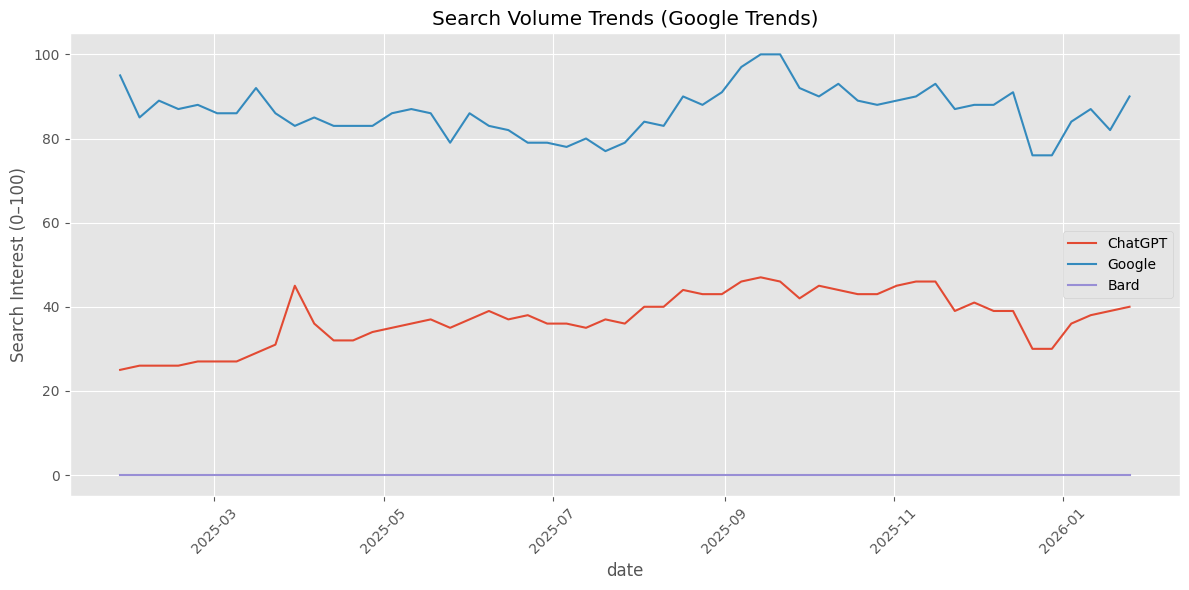

,date,ChatGPT,Google,Bard
0,2025-01-26,25,95,0
1,2025-02-02,26,85,0
2,2025-02-09,26,89,0
3,2025-02-16,26,87,0
4,2025-02-23,27,88,0


In [10]:
!pip install pytrends
# === 7. Google Trends Integration ===

from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
keywords = ["ChatGPT", "Google", "Bard"]
pytrends.build_payload(keywords, cat=0, timeframe='today 12-m', geo='', gprop='')

# Retrieve interest over time
df_trends = pytrends.interest_over_time().reset_index()
df_trends = df_trends.drop(columns=['isPartial'])

# Plot trends
plt.figure(figsize=(12,6))
for kw in keywords:
    sns.lineplot(data=df_trends, x="date", y=kw, label=kw)

plt.title("Search Volume Trends (Google Trends)")
plt.ylabel("Search Interest (0–100)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
df_trends.head()

## 6. Download the Google trends file

In [11]:
df_trends.to_csv("google_trends_data.csv", index=False)


In [12]:
from google.colab import files

# Replace this with your actual filename
files.download('google_trends_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>